Practicing some SQL commands and also performing some analysis through this notebook on the US Baby Names database.
Any kind of feedback is appreciated. Thank you :)

### Importing all the libraries

In [1]:

import numpy as np 
import pandas as pd 
import plotly.graph_objs as go
from plotly.offline import iplot,plot,init_notebook_mode
init_notebook_mode(connected = True)
import sqlite3 as sq
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()


### Connecting to the database

In [2]:
conn=sq.connect('/kaggle/input/us-baby-names/database.sqlite')


### Fetching names of the tables in the database

In [3]:
pd.read_sql("SELECT name FROM sqlite_master WHERE type='table';",conn)


,name
0,NationalNames
1,StateNames


### Counting and Plotting Male and Female entries in the NationalNames table from the year 2000-2008

In [4]:
df_female=pd.read_sql("SELECT COUNT(name) AS Count, year FROM NationalNames WHERE gender='F' AND year BETWEEN 2000 AND 2008 GROUP BY year;",conn)
df_male=pd.read_sql("SELECT COUNT(name) AS Count, year FROM NationalNames WHERE gender='M' AND year BETWEEN 2000 AND 2008 GROUP BY year;",conn)

step1=go.Bar(x=df_female['Year'],y=df_female['Count'],name='Female',orientation='v',text=df_female['Count'],textposition='auto',marker=dict(color='#FF6361'))
step2=go.Bar(x=df_male['Year'],y=df_male['Count'],name='Male',orientation='v',text=df_male['Count'],textposition='auto',marker=dict(color='#003F5C'))
d=[step1,step2]
layout = go.Layout(title ='Female-Male Entries from the years 2000 to 2008',xaxis=dict(tickangle=-25),
   barmode='group')
fig = go.Figure(data = d, layout = layout)
iplot(fig)

### Selecting all the distinct male names in the year 1998.

In [5]:
df=pd.read_sql("SELECT DISTINCT(name) FROM NationalNames WHERE gender='M' AND year='1998';",conn)
df

,Name
0,Michael
1,Jacob
2,Matthew
3,Joshua
4,Christopher
...,...
11293,Zayvon
11294,Ziaire
11295,Zildjian
11296,Zykeem


### Fetching Top 10 famous names in the year 2013

In [6]:
df=pd.read_sql("""SELECT name,count FROM NationalNames WHERE year='2013' ORDER BY count DESC;""",conn)
data=go.Bar(x=df['Name'][:10],y=df['Count'][:10],orientation='v',text=df['Count'],textposition='auto',name='Top 10 famous Names in the year 2013',marker=dict(color='#003F5C'))
layout=go.Layout(title='Top 10 famous Names in the year 2013',xaxis=dict(tickangle=-25),barmode='group')
fig=go.Figure(data=data,layout=layout)
iplot(fig)


### Plotting the usage of the name 'Noah' for male and female from 1880 to 2000

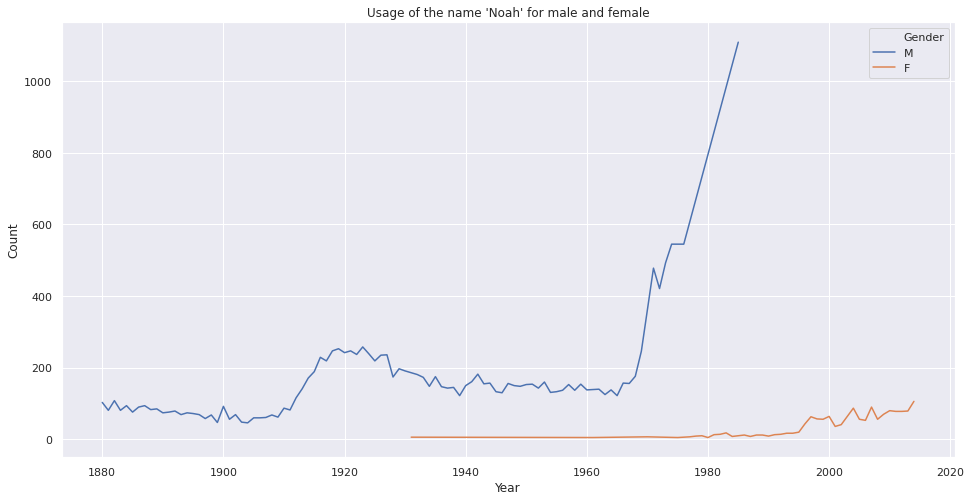

In [7]:
df=pd.read_sql("SELECT count,year,gender FROM NationalNames WHERE name='Noah' GROUP BY year;",conn)
#df_female=pd.read_sql("SELECT count,year,gender FROM NationalNames WHERE name='Sydney' AND gender='F' GROUP BY year;",conn)
fig,ax=plt.subplots()
fig.set_figwidth(16)
fig.set_figheight(8)
ax=sns.lineplot(x='Year',y='Count',hue='Gender',data=df)
ax.set_title("Usage of the name 'Noah' for male and female")
plt.show()

### Converting Names Starting with Y to Upper Case and Gender to Lower Case

In [8]:
pd.read_sql("SELECT UPPER(name) AS Name,LOWER(gender) AS gender FROM NationalNames WHERE name LIKE 'Y%' AND year=1885;",conn)

,Name,gender
0,YETTA,f
1,YOUNG,m
2,YEE,m


### Replacing the names Sydeny with Kidney

In [9]:
pd.read_sql("SELECT name, REPLACE(name,'Sy','Ki')New_Name FROM NationalNames WHERE name='Sydney' LIMIT 5;",conn)

,Name,New_Name
0,Sydney,Kidney
1,Sydney,Kidney
2,Sydney,Kidney
3,Sydney,Kidney
4,Sydney,Kidney


### Fetching the third most used female name in the year 2002

In [10]:
pd.read_sql("SELECT name, MIN(count) FROM(SELECT count,name FROM NationalNames WHERE gender='F' AND year=2002 ORDER BY count DESC LIMIT 3);",conn)

,name,MIN(count)
0,Hannah,18814


### Printing the longest name starting with letter L and ending with a

In [11]:
pd.read_sql("SELECT name,MAX(LENGTH(name))Length,year,count FROM NationalNames WHERE name LIKE 'L%a';",conn)

,Name,Length,Year,Count
0,Luisafernanda,13,2001,5
